In [1]:
a = 2

In [2]:
a 

2

In [3]:
a=3

In [4]:
a

3

In [5]:
a = 2 
b = 4
c = 6


In [6]:
a + b + c

12

In [2]:
a=5
b=4
c=9

a * b * c

In [9]:
import numpy as np
import pandas as pd
df = pd.read_csv("./Churn_Modelling.csv")

df.shape

(10000, 14)

In [11]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
df.drop(['RowNumber', 'CustomerId', 'Surname', 'CreditScore'], axis=1, inplace=True)

In [13]:
df.shape

(10000, 10)

In [14]:
df.columns

Index(['Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [15]:
df.columns.shape

(10,)

In [22]:
df_read = pd.read_csv("./Churn_Modelling.csv", usecols=['Gender', 'Age', 'Tenure', 'Balance'])
df_read.head()



,Gender,Age,Tenure,Balance
0,Female,42,2,0.00
1,Female,41,1,83807.86
2,Female,42,8,159660.80
3,Female,39,1,0.00
4,Female,43,2,125510.82


In [30]:
df_partial = pd.read_csv("./Churn_Modelling.csv", nrows=5000)

In [32]:
df_partial.shape

(5000, 14)

In [33]:
df_partial

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,15583480,Morgan,807,France,Female,36,4,0.00,2,0,1,147007.33,0
4996,4997,15620341,Nwebube,500,Germany,Male,44,9,160838.13,2,1,0,196261.64,0
4997,4998,15613886,Trevisan,722,Spain,Male,43,1,0.00,1,1,0,44560.17,1
4998,4999,15792916,Ositadimma,559,Spain,Female,40,7,144470.77,1,1,1,18917.95,0


In [34]:
df_sample = df.sample(n=1000)
df_sample.shape

(1000, 10)

In [36]:
df_sample2 = df.sample(frac=0.1)
df_sample2.shape

(1000, 10)

In [37]:
df.isna().sum()

Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [38]:
missing_index = np.random.randint(10000, size=20)

In [39]:
df.loc[missing_index, ['Balance','Geography']] = np.nan

In [40]:
df.iloc[missing_index, -1] = np.nan

In [41]:
df.isna().sum()

Geography          20
Gender              0
Age                 0
Tenure              0
Balance            20
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited             20
dtype: int64

In [43]:
df['Geography'].value_counts()


France     5004
Germany    2505
Spain      2471
Name: Geography, dtype: int64

In [44]:
mode = df['Geography'].value_counts().index[0]
df['Geography'].fillna(value=mode, inplace=True)

In [45]:
df.isna().sum()

Geography           0
Gender              0
Age                 0
Tenure              0
Balance            20
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited             20
dtype: int64

In [46]:
mode = df['Balance'].value_counts().index[0]
df['Balance'].fillna(value=mode, inplace=True)

In [47]:
df.isna().sum()

Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited             20
dtype: int64

In [48]:
df.dropna(axis=0, how='any', inplace=True)

In [49]:
df.isna().sum()

Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [50]:
df.isna().sum().sum()

0

In [51]:
france_churn = df[(df.Geography == 'France') & (df.Exited == 1)]
france_churn.Geography.value_counts()

France    809
Name: Geography, dtype: int64

In [52]:
df2 = df.query('80000 < Balance < 100000')

<AxesSubplot:ylabel='Frequency'>

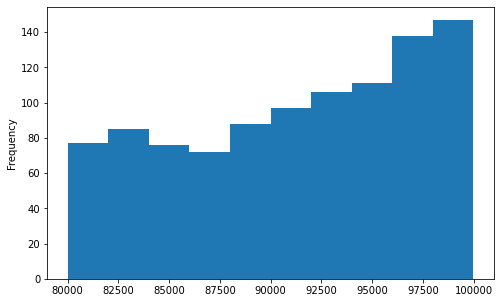

In [57]:
df2['Balance'].plot(kind='hist', figsize=(8,5))

In [63]:
df[df['Age'].isin([4,6,9,10])][:3]

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [65]:
df[df['Tenure'].isin([4,6,9,10])][:3]

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,Germany,Female,29,4,115046.74,4,1,0,119346.88,1.0
8,France,Male,44,4,142051.07,2,0,1,74940.50,0.0
10,France,Male,31,6,102016.72,2,0,0,80181.12,0.0


In [68]:
df[['Geography','Gender','Exited']].groupby(['Geography','Gender']).mean()

Exited
Geography Gender          
France    Female  0.203367
          Male    0.127412
Germany   Female  0.374475
          Male    0.277778
Spain     Female  0.212707
          Male    0.131408

In [69]:
# importing pandas and numpy
import pandas as pd
import numpy as np

# crete a sample dataframe
data = pd.DataFrame({
    'age' :     [ 10, 22, 13, 21, 12, 11, 17],
    'section' : [ 'A', 'B', 'C', 'B', 'B', 'A', 'A'],
    'city' :    [ 'Gurgaon', 'Delhi', 'Mumbai', 'Delhi', 'Mumbai', 'Delhi', 'Mumbai'],
    'gender' :  [ 'M', 'F', 'F', 'M', 'M', 'M', 'F'],
    'favourite_color' : [ 'red', np.NAN, 'yellow', np.NAN, 'black', 'green', 'red']
})


In [70]:
data

,age,section,city,gender,favourite_color
0,10,A,Gurgaon,M,red
1,22,B,Delhi,F,NaN
2,13,C,Mumbai,F,yellow
3,21,B,Delhi,M,NaN
4,12,B,Mumbai,M,black
5,11,A,Delhi,M,green
6,17,A,Mumbai,F,red
